# Training a deep (convolutional) neural network on CIFAR10

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
import os

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.config.list_physical_devices())

2.18.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


We preprare some ground for tensorboard. The cell under will setup a folder where to save the logs to be called within tensorboard.
After you run the notebook one and you ready to try tensorboard, uncomment the cell hier under

In [ ]:
#setup folder where you will save logs for tensorflow
root_logdir = os.path.join(os.curdir,"ML2_Cifar")


def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [ ]:
#create keras Tensorboard callback
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

Import the MNIST Digits library, split into train, validation and test images.

In [ ]:
cifar = tf.keras.datasets.cifar10

(train_full_images, train_full_labels), (test_images, test_labels) = cifar.load_data()

valid_images, train_images = train_full_images[:5000], train_full_images[5000:]
valid_labels, train_labels = train_full_labels[:5000], train_full_labels[5000:]
test_images = test_images

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


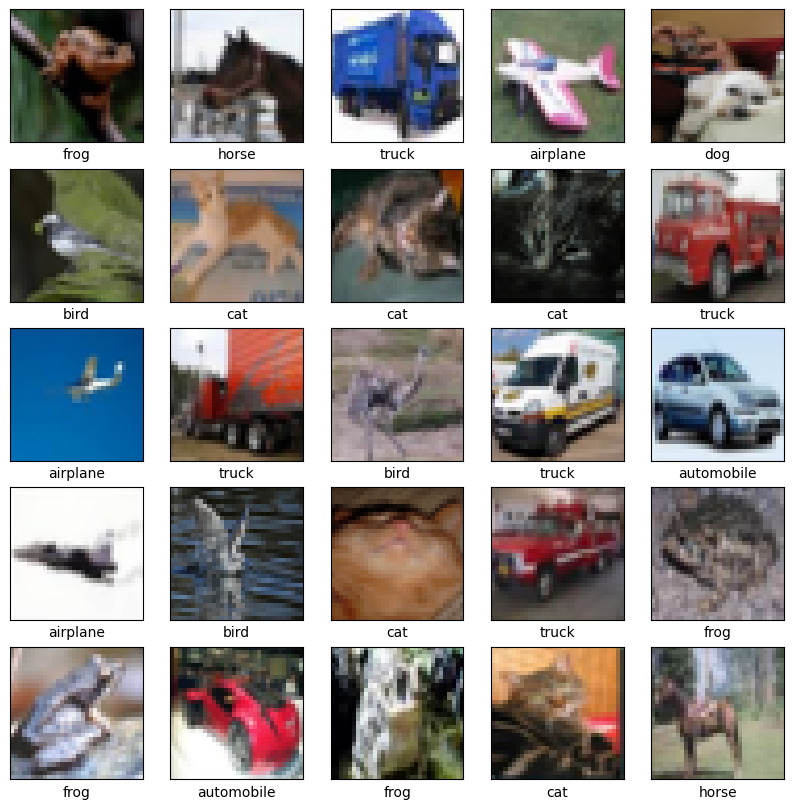

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Check out some properties of the imported dataset

In [ ]:
print('training ds shape:', train_images.shape)
print('validation ds shape:', valid_images.shape)
print('test ds shape:', test_images.shape)

training ds shape: (45000, 32, 32, 3)
validation ds shape: (5000, 32, 32, 3)
test ds shape: (10000, 32, 32, 3)


In [ ]:
print("labels: ", train_labels)

labels:  [[6]
 [7]
 [9]
 ...
 [9]
 [1]
 [1]]


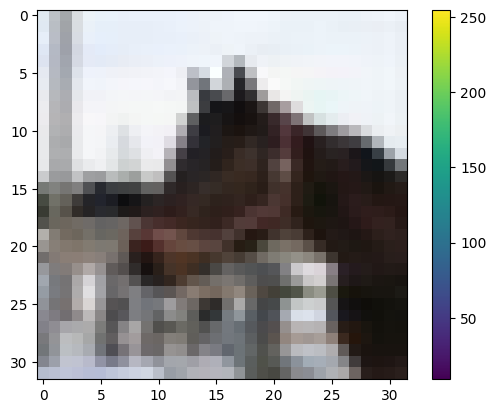

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Normalization of data between 0 and 1

In [ ]:
train_images = train_images / 255.0

valid_images = valid_images / 255.0

test_images = test_images / 255.0

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer = tf.keras.initializers.he_normal),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer = tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=30, validation_data=(valid_images, valid_labels), callbacks=[tensorboard_cb])

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.2454 - loss: 2.2944 - val_accuracy: 0.3680 - val_loss: 1.7869
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.3553 - loss: 1.8114 - val_accuracy: 0.3978 - val_loss: 1.7006
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.3779 - loss: 1.7490 - val_accuracy: 0.3990 - val_loss: 1.6997
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.3879 - loss: 1.7227 - val_accuracy: 0.3932 - val_loss: 1.6916
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.3996 - loss: 1.6910 - val_accuracy: 0.4246 - val_loss: 1.6374
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.4108 - loss: 1.6604 - val_accuracy: 0.4176 - val_loss: 1.6423
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.4179 - loss: 1.6412 - val_accuracy: 0.4238 - val_loss: 1.6196
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.4206 -

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.4505 - loss: 1.5547

Test accuracy: 0.4505000114440918
